In [7]:
from time import time
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

## Parte 1: Cargado y Limpieza de datos

In [8]:
df_speeches = pd.read_csv('../data/us_2020_election_speeches.csv')
df_speeches

,speaker,title,text,date,location,type
0,David Perdue,Georgia Sen. David Perdue Speech Transcript at...,David Perdue: (00:01)\nHow great is it to be b...,"Oct 16, 2020","Macon, Georgia",Campaign Speech
1,Joe Biden,"Joe Biden Southfield, MI Speech on Health Care...","Joe Biden: (00:00)\nHello, Michigan. Hi, how a...","Oct 16, 2020","Southfield ,Michigan",Campaign Speech
2,Donald Trump,Donald Trump Speech Transcript ‘Protecting Ame...,President Trump: (00:30)\nThank you. What a ni...,"Oct 16, 2020","Fort Myers, Florida",Campaign Speech
3,Joe Biden,Joe Biden ABC Town Hall Transcript October 15,"George Stephanopoulos: (00:41)\nHey, and welco...","Oct 15, 2020",ABC,Town Hall
4,Donald Trump,Donald Trump NBC Town Hall Transcript October 15,Savannah Guthrie: (03:50)\nIt’s nothing but no...,"Oct 15, 2020",NBC,Town Hall
...,...,...,...,...,...,...
264,Bernie Sanders,Bernie Sanders Speech Transcript: Sanders Spea...,Bernie Sanders: (00:00)\nJust want to take thi...,"Feb 6, 2020",Iowa,Campaign Speech
265,Democratic Candidates,Transcript: Speeches at the Iowa Caucuses – Be...,Bernie Sanders: (00:08)\nThank you. Thank you....,"Feb 4, 2020",Iowa,Campaign Speech
266,Donald Trump,Donal Trump Iowa Rally Transcript: Trump Holds...,Donald Trump: (00:24)\nI worked so hard for th...,"Jan 30, 2020","Des Moines, Iowa",Campaign Speech
267,Donald Trump,Donald Trump New Jersey Rally Speech Transcrip...,Donald Trump: (01:22)\nThank you. Thank you. I...,"Jan 28, 2020","Wildwood, New Jersey",Campaign Speech


# A) Datos faltantes

Hacemos uso de las funciones len() y el atributo count() para obtener los datos faltantes por variable en el dataframe df_speeches

In [9]:
n = len(df_speeches)
count = df_speeches.count()
n-count

speaker      3
title        0
text         0
date         0
location    18
type        21
dtype: int64

In [10]:
# select numerical columns
df_speeches.dtypes

speaker     object
title       object
text        object
date        object
location    object
type        object
dtype: object

In [11]:
def get_var_category(series):
    unique_count = series.nunique(dropna=False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numerical'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Date'
    elif unique_count==total_count:
        return 'Text (Unique)'
    else:
        return 'Categorical'

def print_categories(df):
    for column_name in df.columns:
        print(column_name, ": ", get_var_category(df[column_name]))

print_categories(df_speeches)

speaker :  Categorical
title :  Text (Unique)
text :  Text (Unique)
date :  Categorical
location :  Categorical
type :  Categorical


In [12]:
df_speeches.describe()

,speaker,title,text,date,location,type
count,266,269,269,269,251,248
unique,71,269,269,123,102,9
top,Joe Biden,Georgia Sen. David Perdue Speech Transcript at...,David Perdue: (00:01)\nHow great is it to be b...,"Aug 20, 2020",Virtual,Campaign Speech
freq,71,1,1,9,62,180


In [13]:
# how many types and obs are?
df_speeches["type"].value_counts()

type
Campaign Speech       180
Town Hall              18
Interview              14
Debate                  9
Endorsement             8
Statement               8
Roundtable              8
Press Conference        2
Voter Mobilization      1
Name: count, dtype: int64

In [14]:
# filter campaign speeches
speeches = df_speeches[df_speeches["type"] == "Campaign Speech"]


In [15]:
# group speeches by speaker
speeches["speaker"].value_counts()


speaker
Joe Biden                   43
Donald Trump                41
Mike Pence                  17
Bernie Sanders               9
Kamala Harris                7
Multiple Speakers            5
Democratic Candidates        4
Jill Biden                   2
Pete Buttigieg               2
David Perdue                 1
Gavin Newsom                 1
Elizabeth Warren             1
Barack Obama                 1
Andrew Yang                  1
Michael Bloomberg            1
Cory Booker                  1
Sarah Cooper                 1
Nancy Pelosi                 1
Hillary Clinton              1
Bill Clinton                 1
Cindy McCain                 1
Colin Powell                 1
Alexandria Ocasio-Cortez     1
Nikki Haley                  1
Chuck Schumer                1
Michelle Obama               1
John Kasich                  1
Andrew Cuomo                 1
Gretchen Whitmer             1
Joe Biden, Barack Obama      1
Kanye West                   1
Jim Jordan                   1


In [16]:
top5_speakers = speeches["speaker"].value_counts().head(5).index

top_speeches = speeches[speeches["speaker"].isin(top5_speakers)]


# B) Gráfica para visualizar discursos de los candidatos por año

/var/folders/sh/mgw2m9dj0zs38sv3l9p5h_780000gn/T/ipykernel_4713/3507560894.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_speeches["CleanText"] = clean_text(top_speeches, "text")
/var/folders/sh/mgw2m9dj0zs38sv3l9p5h_780000gn/T/ipykernel_4713/3507560894.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_speeches["date"] = pd.to_datetime(top_speeches["date"], errors="coerce")
/var/folders/sh/mgw2m9dj0zs38sv3l9p5h_780000gn/T/ipykernel_4713/3507560894.py:29: SettingWithCopyWarning: 
A value is 

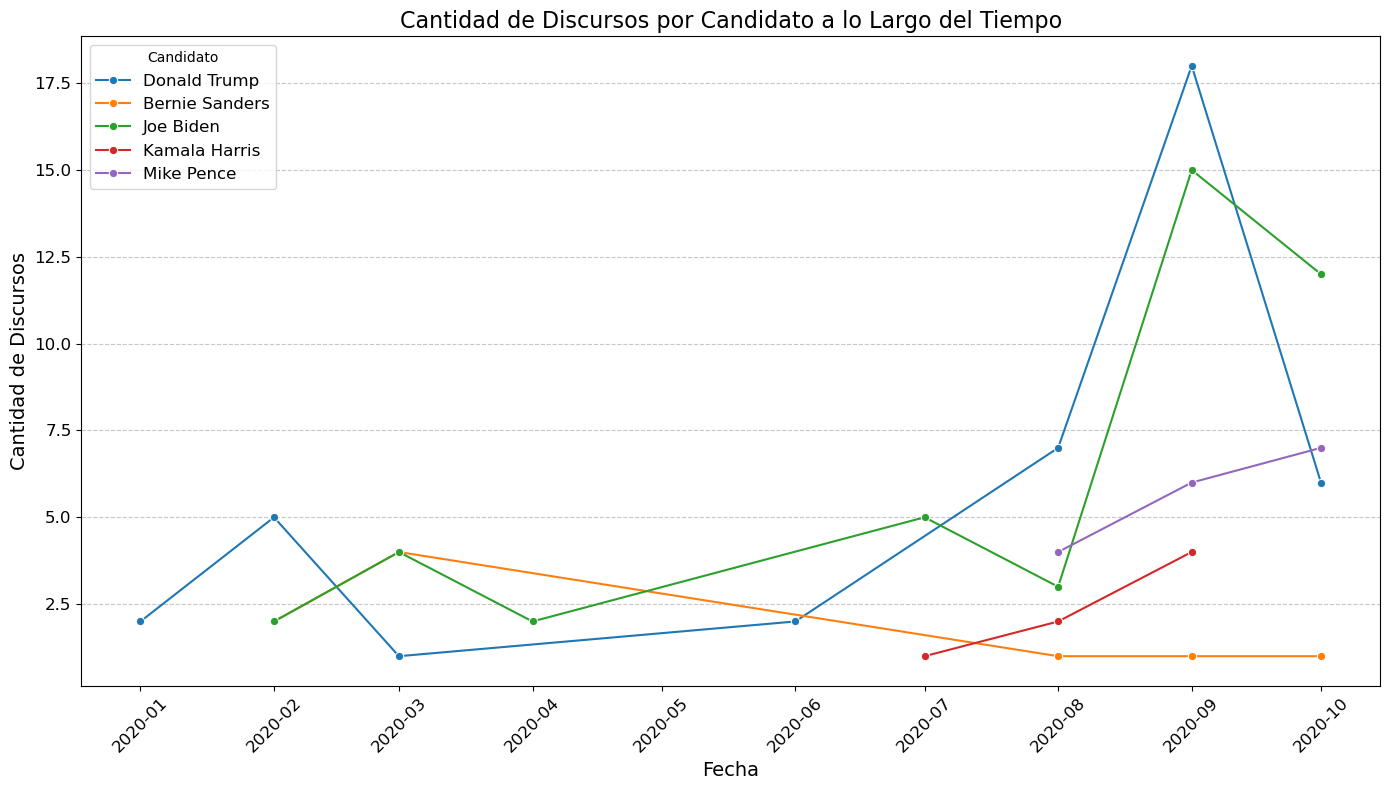

In [17]:
def clean_text(df, column_name):
    # Eliminar primeras palabras hasta el primer "\n"
    result = df[column_name].str.replace(r"^[^\n]*\n", "", regex=True)
    
    # Convertir todo a minúsculas
    result = result.str.lower()
    
    # Eliminar signos de puntuación y caracteres no deseados
    for punc in ["[", "]", "\n", ",", ":", "?", ".", "!", ";", "\"", "\'"]:
        result = result.str.replace(punc, " ", regex=False)
    
    # Eliminar espacios extra
    result = result.str.replace(r"\s+", " ", regex=True).str.strip()
    
    return result

# Crear la columna CleanText
top_speeches["CleanText"] = clean_text(top_speeches, "text")


# Asegurarse de que la columna 'date' esté en formato datetime
top_speeches["date"] = pd.to_datetime(top_speeches["date"], errors="coerce")

# Verificar si hay valores nulos después de la conversión
if top_speeches["date"].isnull().any():
    print("Advertencia: Hay valores nulos en la columna 'date' después de la conversión.")

# Agrupar por mes para reducir la cantidad de puntos en el eje X
top_speeches["month"] = top_speeches["date"].dt.to_period("M")
top_speeches_grouped = top_speeches.groupby(["month", "speaker"]).size().reset_index(name="count")

# Convertir el período a una fecha para el gráfico
top_speeches_grouped["month"] = top_speeches_grouped["month"].dt.to_timestamp()

# Crear la visualización
plt.figure(figsize=(14, 8))
sns.lineplot(data=top_speeches_grouped, x="month", y="count", hue="speaker", marker="o")
plt.title("Cantidad de Discursos por Candidato a lo Largo del Tiempo", fontsize=16)
plt.xlabel("Fecha", fontsize=14)
plt.ylabel("Cantidad de Discursos", fontsize=14)
plt.legend(title="Candidato", fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

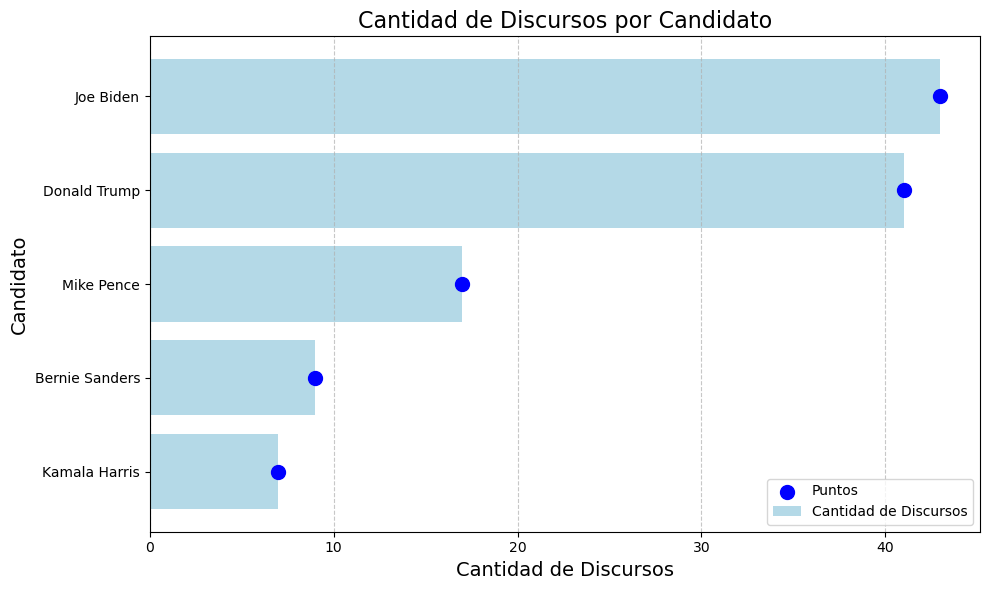

In [18]:
# Agrupar los datos por candidato y contar la cantidad de discursos
lollipop_data = top_speeches.groupby("speaker").size().reset_index(name="count")

# Ordenar los datos por la cantidad de discursos
lollipop_data = lollipop_data.sort_values(by="count", ascending=False)

# Crear el gráfico de lollipop
plt.figure(figsize=(10, 6))
sns.barplot(data=lollipop_data, x="count", y="speaker", color="skyblue", alpha=0.7, label="Cantidad de Discursos")
plt.scatter(lollipop_data["count"], lollipop_data["speaker"], color="blue", s=100, label="Puntos")

# Personalizar el gráfico
plt.title("Cantidad de Discursos por Candidato", fontsize=16)
plt.xlabel("Cantidad de Discursos", fontsize=14)
plt.ylabel("Candidato", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/sh/mgw2m9dj0zs38sv3l9p5h_780000gn/T/ipykernel_4713/1679564151.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_speeches["date"] = pd.to_datetime(top_speeches["date"], errors="coerce")
/var/folders/sh/mgw2m9dj0zs38sv3l9p5h_780000gn/T/ipykernel_4713/1679564151.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_speeches["quarter"] = top_speeches["date"].dt.to_period("Q").dt.to_timestamp()
/var/folders/sh/mgw2m9dj0zs38sv3l9p5h_780000gn/T/ipykernel_4713/1679564151.py:20: SettingWithCopyW

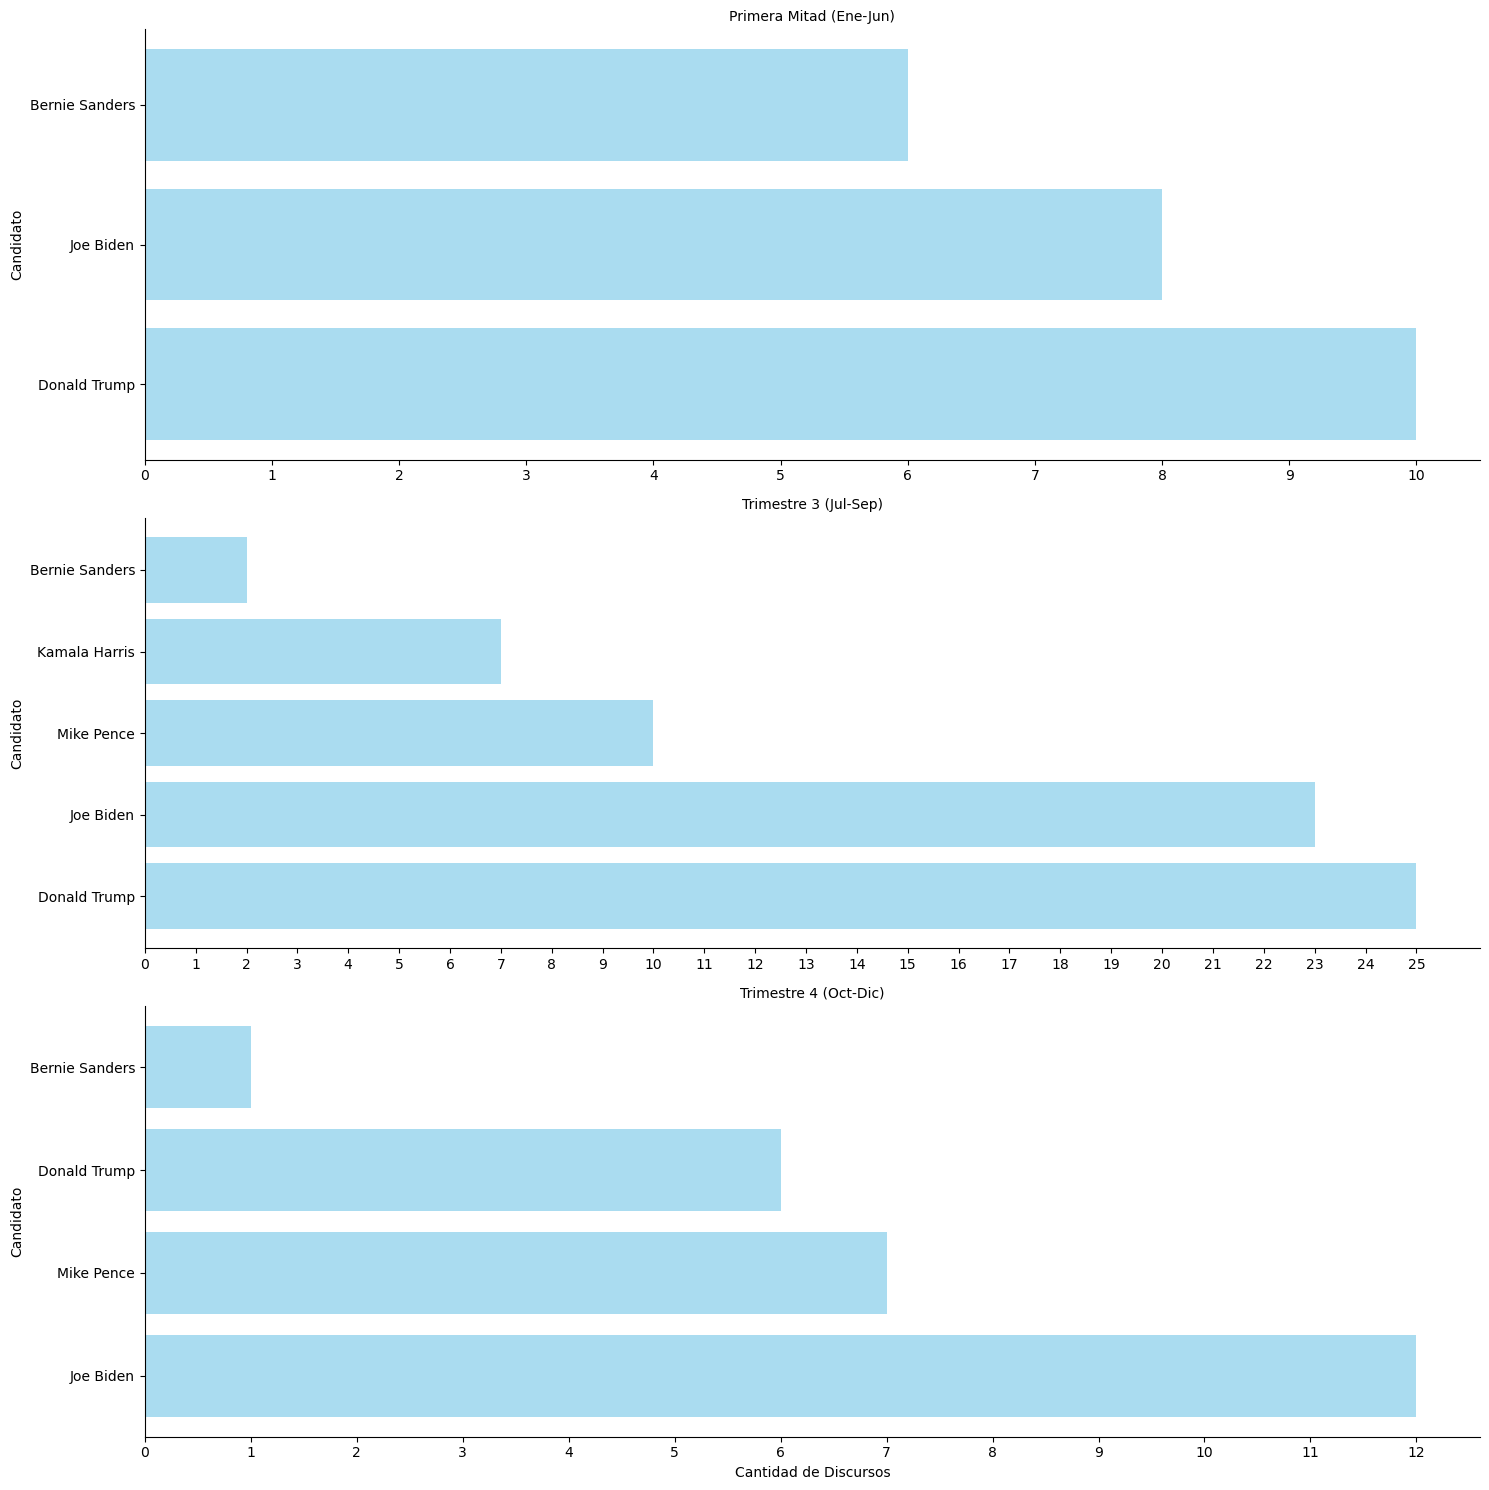

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Asegurarse de que la columna 'date' esté en formato datetime
top_speeches["date"] = pd.to_datetime(top_speeches["date"], errors="coerce")

# Agrupar los datos por trimestre y candidato, y contar la cantidad de discursos
top_speeches["quarter"] = top_speeches["date"].dt.to_period("Q").dt.to_timestamp()

# Crear una nueva columna para agrupar el primer y segundo trimestre
def group_quarters(quarter):
    if quarter.month in [1, 2, 3, 4, 5, 6]:  # Trimestres 1 y 2
        return "Primera Mitad (Ene-Jun)"
    elif quarter.month in [7, 8, 9]:  # Trimestre 3
        return "Trimestre 3 (Jul-Sep)"
    else:  # Trimestre 4
        return "Trimestre 4 (Oct-Dic)"

top_speeches["grouped_quarter"] = top_speeches["quarter"].apply(group_quarters)

# Agrupar los datos por la nueva columna y candidato, y contar la cantidad de discursos
facet_data = top_speeches.groupby(["grouped_quarter", "speaker"]).size().reset_index(name="count")

# Ordenar los datos por frecuencia dentro de cada grupo
facet_data = facet_data.sort_values(by=["grouped_quarter", "count"], ascending=[True, False])

# Crear el FacetGrid con una faceta por fila y ajustar el ancho
g = sns.FacetGrid(facet_data, row="grouped_quarter", height=5, aspect=3, sharex=False, sharey=False)

# Agregar gráficos de lollipop a cada faceta (sin puntos)
def lollipop_plot(data, **kwargs):
    # Ordenar las barras por frecuencia
    data = data.sort_values(by="count", ascending=False)
    plt.barh(data["speaker"], data["count"], color="skyblue", alpha=0.7)
    # Ajustar la escala del eje X para que sea discreta
    max_count = data["count"].max()
    plt.xticks(np.arange(0, max_count + 1, 1))  # Escala discreta con pasos de 1

g.map_dataframe(lollipop_plot)

# Personalizar los títulos y las etiquetas
g.set_titles("{row_name}")
g.set_axis_labels("Cantidad de Discursos", "Candidato")
g.tight_layout()
plt.show()

# Parte C) Limpieza de texto

In [48]:
def clean_text(df, column_name):
    # Eliminar primeras palabras hasta el primer "\n"
    result = df[column_name].str.replace(r"^[^\n]*\n", "", regex=True)
    
    # Convertir todo a minúsculas
    result = result.str.lower()
    
    # Eliminar signos de puntuación y caracteres no deseados
    for punc in ["[", "]", "\n", ",", ":", "?", ".", "!", ";", "\"", "\'"]:
        result = result.str.replace(punc, " ", regex=False)
    
    # Eliminar espacios extra
    result = result.str.replace(r"\s+", " ", regex=True).str.strip()
    
    return result

# Crear la columna CleanText
top_speeches["CleanText"] = clean_text(top_speeches, "text")




/var/folders/sh/mgw2m9dj0zs38sv3l9p5h_780000gn/T/ipykernel_4713/1298669112.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mauroloprete/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/sh/mgw2m9dj0zs38sv3l9p5h_780000gn/T/ipykernel_4713/1404019355.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/sh/mgw2m9dj0zs38sv3l9p5h_780000gn/T/ipykernel_4713/1404019355.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



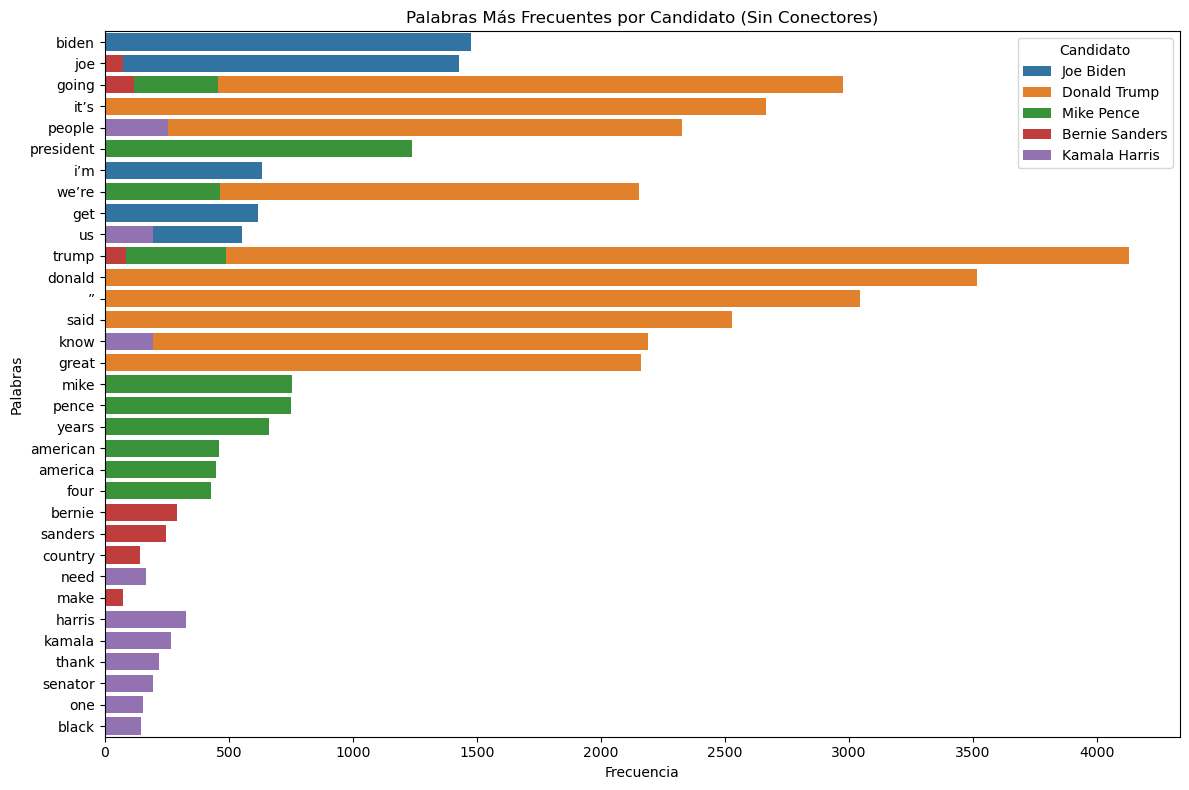

In [50]:
from collections import Counter
from nltk.corpus import stopwords

# Descargar stopwords si es necesario
import nltk
nltk.download('stopwords')

# Crear una lista de stopwords en inglés
stop_words = set(stopwords.words('english'))

# Crear la columna WordList si no existe
if "WordList" not in top_speeches.columns:
    top_speeches["WordList"] = top_speeches["CleanText"].str.split()

# Filtrar las palabras eliminando las stopwords
top_speeches["FilteredWordList"] = top_speeches["WordList"].apply(
    lambda words: [word for word in words if word not in stop_words]
)

# Contar palabras por candidato
word_counts = {}
for speaker in top_speeches["speaker"].unique():
    all_words = top_speeches[top_speeches["speaker"] == speaker]["FilteredWordList"].explode()
    word_counts[speaker] = Counter(all_words)

# Crear un DataFrame con las palabras más frecuentes
top_words = pd.DataFrame([
    {"speaker": speaker, "word": word, "count": count}
    for speaker, counts in word_counts.items()
    for word, count in counts.most_common(10)
])

# Visualización
plt.figure(figsize=(12, 8))
sns.barplot(data=top_words, x="count", y="word", hue="speaker", dodge=False)
plt.title("Palabras Más Frecuentes por Candidato (Sin Conectores)")
plt.xlabel("Frecuencia")
plt.ylabel("Palabras")
plt.legend(title="Candidato")
plt.tight_layout()
plt.show()

# TODO: Ordenar todo esto y redactar (Es de la parte 2)

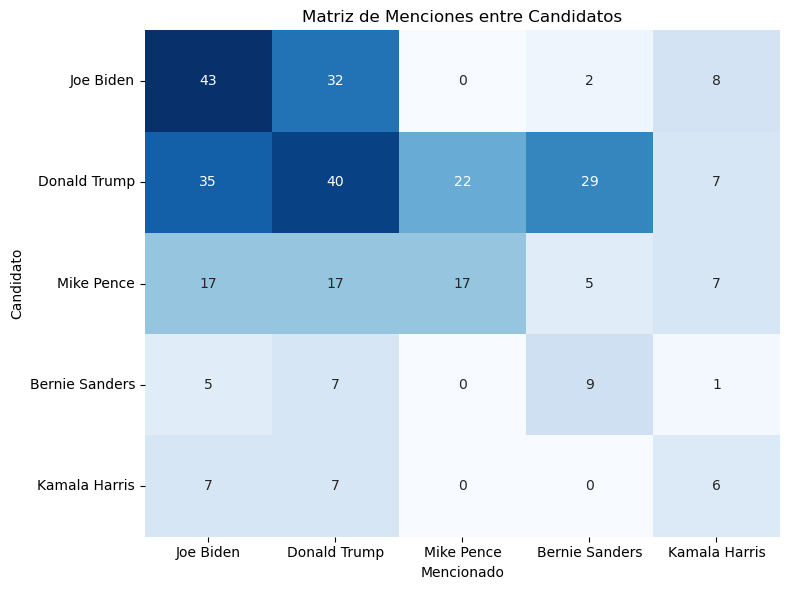

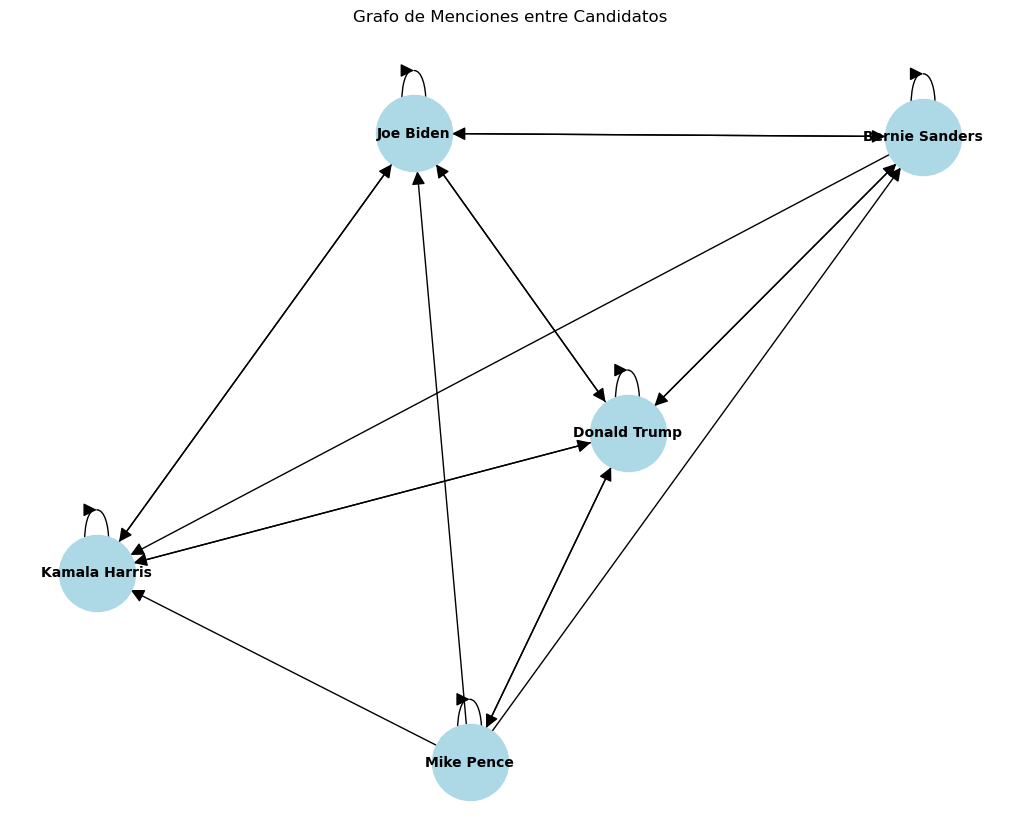

In [ ]:
candidates = top_speeches["speaker"].unique()
mentions_matrix = pd.DataFrame(0, index=candidates, columns=candidates)

# Menciones entre candidatos (sin contar a sí mismos) # FIX: si menciona a mas de uno se cuenta en cada candidato
for speaker in candidates:
    for mentioned in candidates:
        mentions_matrix.loc[speaker, mentioned] = top_speeches[
            (top_speeches["speaker"] == speaker) & 
            (top_speeches["CleanText"].str.contains(mentioned, case=False))
        ].shape[0]

# Visualizar la matriz
plt.figure(figsize=(8, 6))
sns.heatmap(mentions_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Menciones entre Candidatos")
plt.xlabel("Mencionado")
plt.ylabel("Candidato")
plt.tight_layout()
plt.show()



In [ ]:
# Crear un grafo dirigido
G = nx.from_pandas_adjacency(mentions_matrix, create_using=nx.DiGraph)
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrowsize=20)
plt.title("Grafo de Menciones entre Candidatos")
plt.show()